In [1]:
import numpy as np
from scipy import sparse as sp
from scipy.sparse.linalg import spsolve
from matplotlib import pyplot as plt
from matplotlib.ticker import IndexLocator
import time, sys
import pickle
import torch
import torch.nn as nn

In [2]:
# Given parameters
nx = 60
ny = 60
tf = 1.0
dt = 2.0e-3
nt = int(tf/dt)
xmin = 0; xmax = 1
ymin = 0; ymax = 1
dims = (ny,nx)

# latent space dim.
f_list=np.array([3,4,5,6])
print('Latent Sapce Dim. {}'.format(f_list))

# parameters
p_inter=5
FOM_parameters = np.arange(75,125+1,1,dtype=int)
print("Prediction Parameters: {}".format(FOM_parameters))
print("training parameters={}".format(FOM_parameters[p_inter:-p_inter:p_inter]))

# generate mesh grid
[xv,yv]=np.meshgrid(np.linspace(xmin,xmax,nx),np.linspace(ymin,ymax,ny),indexing='xy')
x=xv.flatten()
y=yv.flatten()

# file path
file_path_gappy_SOPT_result = "./diffusion_result/ex16_AE_swish_gappy_inner_SOPT_result_seed_{}.p".format(seed)
print(file_path_gappy_SOPT_result)

# Gauss-Newton params
maxitr=4
tol=1e-8

# full, inner, bc index
multi_index_i,multi_index_j=np.meshgrid(np.arange(nx),np.arange(ny),indexing='xy')
full_multi_index=(multi_index_j.flatten(),multi_index_i.flatten())
x0_multi_index=(multi_index_j[:,0].flatten(),multi_index_i[:,0].flatten())
x1_multi_index=(multi_index_j[:,-1].flatten(),multi_index_i[:,-1].flatten())
y0_multi_index=(multi_index_j[0,:].flatten(),multi_index_i[0,:].flatten())
y1_multi_index=(multi_index_j[-1,:].flatten(),multi_index_i[-1,:].flatten())

dims=(ny,nx)
full_raveled_indicies=np.ravel_multi_index(full_multi_index,dims)
x0_raveled_indicies=np.ravel_multi_index(x0_multi_index,dims)
x1_raveled_indicies=np.ravel_multi_index(x1_multi_index,dims)
y0_raveled_indicies=np.ravel_multi_index(y0_multi_index,dims)
y1_raveled_indicies=np.ravel_multi_index(y1_multi_index,dims)
bc_raveled_indicies=np.unique(np.concatenate((x0_raveled_indicies,x1_raveled_indicies,
                                              y0_raveled_indicies,y1_raveled_indicies)))
inner_raveled_indicies=np.setdiff1d(full_raveled_indicies,bc_raveled_indicies)

Latent Sapce Dim. [3 4 5 6]
Prediction Parameters: [ 75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125]
training parameters=[ 80  85  90  95 100 105 110 115 120]
./diffusion_result/ex16_AE_swish_gappy_inner_SOPT_result_seed_5.p


In [3]:
# S-OPT
file_path_SOPT="/home/test/pylibROM_docker/pylibROM/tests/model/ex16_AE_inner_SOPT_no_oversampling.p"
with open(file=file_path_SOPT, mode='rb') as ff:  
        msmt_idx_list = pickle.load(ff)

Dim. of latent space is 3
# of measurments: 12
[  61  201  416  963 1318 1891 2095 2607 2945 3111 3142 3178]
Dim. of latent space is 4
# of measurments: 12
[  61  182  356  732 1766 1862 3178 3217 3401 3407 3487 3500]
Dim. of latent space is 5
# of measurments: 12
[  61  199  545  726  731 1922 2158 2253 3058 3231 3390 3477]
Dim. of latent space is 6
# of measurments: 12
[  61  183  430  734 1375 1807 3079 3293 3469 3502 3512 3538]


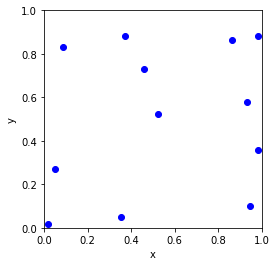

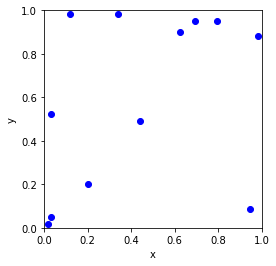

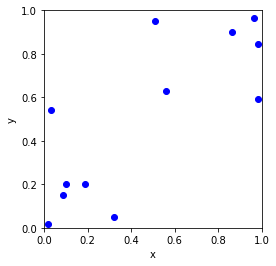

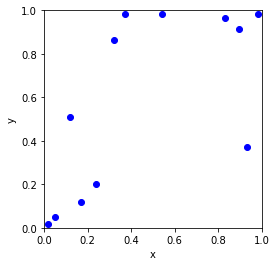

In [4]:
for ii in range(len(f_list)):
    f=f_list[ii]
    print("Dim. of latent space is {}".format(f))

    # file path
    file_name_AE="./diffusion_model/ex16_AE_{}_swish_seed_{}.p".format(f,seed)
    file_path_residual_SVD="./diffusion_model/ex16_AE_{}_swish_residual_SVD_seed_{}.p".format(f,seed)

    # SOPT
    msmt_idx=msmt_idx_list[ii]
    num_msmt=len(msmt_idx)
    print("# of measurments: {}".format(num_msmt))
    print(msmt_idx)

    # plot measuremnt positions
    plt.figure()
    plt.scatter(x[msmt_idx],y[msmt_idx], color = 'blue')
    plt.axis('square')
    plt.axis([xmin,xmax,ymin,ymax])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.savefig("./diffusion_result/ex16_AE_{}_swish_inner_SOPT_{}_samples_seed_{}.png".format(f,num_msmt,seed))

# gappyAE

Dim. of latent space is 3
# of measurments: 12
[  61  201  416  963 1318 1891 2095 2607 2945 3111 3142 3178]


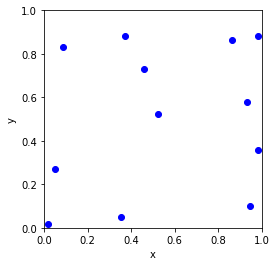

Param is 75
Time elapsed: 31.133631706237793 sec
average relative error of u: 0.2013360698981051%
maximum relative error of u: 0.46813661148407254%

Param is 76
Time elapsed: 32.136549949645996 sec
average relative error of u: 0.15663925341321247%
maximum relative error of u: 0.44680265356327037%

Param is 77
Time elapsed: 28.540159702301025 sec
average relative error of u: 0.12044416315022118%
maximum relative error of u: 0.4325313693140504%

Param is 78
Time elapsed: 31.63801074028015 sec
average relative error of u: 0.09275474102643151%
maximum relative error of u: 0.4217367269075448%

Param is 79
Time elapsed: 26.7994122505188 sec
average relative error of u: 0.07344882280406241%
maximum relative error of u: 0.4120449859081943%

Param is 80
Time elapsed: 29.000209093093872 sec
average relative error of u: 0.06180993601457152%
maximum relative error of u: 0.4022662465188302%

Param is 81
Time elapsed: 28.87351703643799 sec
average relative error of u: 0.05614638323158392%
maximum re

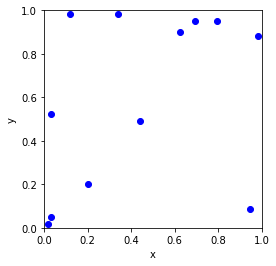

Param is 75
Time elapsed: 31.339370727539062 sec
average relative error of u: 0.20628045636945208%
maximum relative error of u: 0.8044571555554133%

Param is 76
Time elapsed: 28.82007622718811 sec
average relative error of u: 0.15834411805132487%
maximum relative error of u: 0.682443753751331%

Param is 77
Time elapsed: 33.80292820930481 sec
average relative error of u: 0.11911914167776173%
maximum relative error of u: 0.5796549258919719%

Param is 78
Time elapsed: 29.972318172454834 sec
average relative error of u: 0.08883804296509284%
maximum relative error of u: 0.4966978678387114%

Param is 79
Time elapsed: 31.254770517349243 sec
average relative error of u: 0.06758772800160179%
maximum relative error of u: 0.4332076204841287%

Param is 80
Time elapsed: 32.64819025993347 sec
average relative error of u: 0.05491594507172967%
maximum relative error of u: 0.38743529027930906%

Param is 81
Time elapsed: 28.677746772766113 sec
average relative error of u: 0.04911290809055455%
maximum re

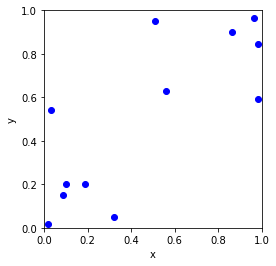

Param is 75
Time elapsed: 18.048568964004517 sec
average relative error of u: 0.24276308859646206%
maximum relative error of u: 0.5792192224823061%

Param is 76
Time elapsed: 17.94837474822998 sec
average relative error of u: 0.18136487261280038%
maximum relative error of u: 0.5136175839306771%

Param is 77
Time elapsed: 18.094538688659668 sec
average relative error of u: 0.13183752048425423%
maximum relative error of u: 0.46821987742712984%

Param is 78
Time elapsed: 17.528571844100952 sec
average relative error of u: 0.09455352304596021%
maximum relative error of u: 0.4390678301739184%

Param is 79
Time elapsed: 17.832255601882935 sec
average relative error of u: 0.06989574190085113%
maximum relative error of u: 0.4215313554413219%

Param is 80
Time elapsed: 17.51234531402588 sec
average relative error of u: 0.05735426003752235%
maximum relative error of u: 0.41139973402236585%

Param is 81
Time elapsed: 17.63256597518921 sec
average relative error of u: 0.0537340464977531%
maximum r

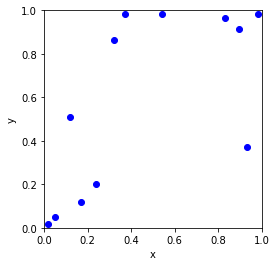

Param is 75
Time elapsed: 20.288121461868286 sec
average relative error of u: 0.21951554649763858%
maximum relative error of u: 0.8538637544414055%

Param is 76
Time elapsed: 20.858241081237793 sec
average relative error of u: 0.1640893504075089%
maximum relative error of u: 0.6928642418402993%

Param is 77
Time elapsed: 20.47083830833435 sec
average relative error of u: 0.1212499602749744%
maximum relative error of u: 0.5827687546392364%

Param is 78
Time elapsed: 19.781192541122437 sec
average relative error of u: 0.0909067011278519%
maximum relative error of u: 0.5129224046452784%

Param is 79
Time elapsed: 18.034910678863525 sec
average relative error of u: 0.07209826558998592%
maximum relative error of u: 0.46902685329792504%

Param is 80
Time elapsed: 16.802324533462524 sec
average relative error of u: 0.06253479205805627%
maximum relative error of u: 0.4391408555206644%

Param is 81
Time elapsed: 16.672499895095825 sec
average relative error of u: 0.058758511297028575%
maximum r

In [5]:
solution=np.zeros((len(f_list),len(FOM_parameters),nt+1,nx*ny))
reduced=np.zeros((len(f_list),len(FOM_parameters),nt+1,f_list[-1]))
avg_rel_err=np.zeros((len(f_list),len(FOM_parameters)))
rel_err=np.zeros((len(f_list),len(FOM_parameters),nt+1))
elapsed_time=np.zeros((len(f_list),len(FOM_parameters)))

for ii in range(len(f_list)):
    f=f_list[ii]
    print("Dim. of latent space is {}".format(f))
    
    # file path
    file_name_AE="./diffusion_model/ex16_AE_{}_swish_seed_{}.p".format(f,seed)
    file_path_residual_SVD="./diffusion_model/ex16_AE_{}_swish_residual_SVD_seed_{}.p".format(f,seed)
    
    # SOPT
    msmt_idx=msmt_idx_list[ii]
    num_msmt=len(msmt_idx)
    print("# of measurments: {}".format(num_msmt))
    print(msmt_idx)
    
    # precompute
    with open(file=file_path_residual_SVD, mode='rb') as fff:
        SVD=pickle.load(fff)
    U=SVD['U']
    phi_r=U[:,:num_msmt]

    ZTphi_r=phi_r[msmt_idx]
    ZTphi_r_pinv=np.linalg.pinv(ZTphi_r)
    phi_rZTphi_r_pinv=phi_r.dot(ZTphi_r_pinv)

    # plot measuremnt positions
    plt.figure()
    plt.scatter(x[msmt_idx],y[msmt_idx], color = 'blue')
    plt.axis('square')
    plt.axis([xmin,xmax,ymin,ymax])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
        
    with open(file=file_name_AE, mode='rb') as ff:    
        AE = pickle.load(ff)

    en_wu1=AE['en_wu1']
    en_bu1=AE['en_bu1']
    en_wu2=AE['en_wu2']
    de_wu1=AE['de_wu1']
    de_bu1=AE['de_bu1']
    de_wu2=AE['de_wu2']
    de_wu1T=AE['de_wu1T']
    de_wu2T=AE['de_wu2T']
    de_wu2_sp=AE['de_wu2_sp']
    de_wu2T_sp=AE['de_wu2T_sp']
    u_ref=AE['u_ref']

    latent_dim=de_wu1.shape[1]
    
    # numpy version of AE
    def sigmoid_np(input):
        return (1.0/(1.0+np.exp(-input))).astype('float32')

    def encoder_u_np_forward(x):
        z1 = en_wu1.dot(x) + en_bu1
        a1 = z1 * sigmoid_np(z1)
        y = en_wu2.dot(a1)   
        return y

    def decoder_u_np_forward(x):
        z1 = de_wu1.dot(x) + de_bu1
        a1 = z1 * sigmoid_np(z1)
        y = de_wu2.dot(a1)  
        return y

    def decoder_u_sp_forward(x):
        z1 = de_wu1.dot(x) + de_bu1
        a1 = z1 * sigmoid_np(z1)
        y = sp.csr_matrix.dot(de_wu2_sp,a1)
        return y

    def decoder_u_np_forward_backwardT(x):
        z1 = de_wu1.dot(x) + de_bu1
        sigma = sigmoid_np(z1)
        a1 = z1 * sigma
        y = de_wu2.dot(a1)

        dout = de_wu1T
        dout = (sigma+a1*(1-sigma))*dout
        dydxT = dout.dot(de_wu2T)   
        return y,dydxT

    def decoder_u_sp_forward_backwardT(x):
        z1 = de_wu1.dot(x) + de_bu1
        sigma = sigmoid_np(z1)
        a1 = z1 * sigma
        y = sp.csr_matrix.dot(de_wu2_sp,a1)

        dout = de_wu1T
        dout = (sigma+a1*(1-sigma))*dout
        dydxT = sp.csr_matrix.dot(dout,de_wu2T_sp)
        return y,dydxT
    
    m,M2=de_wu2.shape

    class Decoder_U_FC(nn.Module):

        def __init__(self,):
            super(Decoder_U_FC, self).__init__()
            self.fc1 = nn.Linear(latent_dim,M2)
            self.fc1.weight = nn.Parameter(torch.ones(de_wu1.shape))
            self.fc1.bias = nn.Parameter(torch.ones(de_bu1.shape))
    #         self.fc1.weight = nn.Parameter(torch.tensor(de_wu1))
    #         self.fc1.bias = nn.Parameter(torch.tensor(de_bu1))

            self.fc2 = nn.Linear(M2,m,bias=False)
            self.fc2.weight = nn.Parameter(torch.ones(de_wu2.shape))
    #         self.fc2.weight = nn.Parameter(torch.tensor(de_wu2))

        def forward(self, x):
            x = self.fc1(x)
            x = self.fc2(x)
            return x

    model = Decoder_U_FC()

    x_in=torch.ones(latent_dim)
    y_out=model(x_in)

    p_hr=msmt_idx

    upstream=torch.zeros_like(y_out)
    upstream[p_hr]=1.0

    y_out.backward(upstream)

    # masks for subnet
    wu1_mask=model.fc1.weight.grad
    wu2_mask=model.fc2.weight.grad

    bu1_mask=model.fc1.bias.grad

    # subnet sparse weight
    idx1=wu1_mask.to_sparse()._indices()
    i1=idx1.numpy()[0]
    j1=idx1.numpy()[1]
    v1=de_wu1[i1,j1]
    wu1_sb_sp=sp.csr_matrix(sp.csr_matrix((v1,(i1,j1)),shape=wu1_mask.shape).toarray())

    idx2=wu2_mask.to_sparse()._indices()
    i2=idx2.numpy()[0]
    j2=idx2.numpy()[1]
    v2=de_wu2[i2,j2]
    wu2_sb_sp=sp.csr_matrix(sp.csr_matrix((v2,(i2,j2)),shape=wu2_mask.shape).toarray())

    # subnet compressed weight
    i1,j1,v1=sp.find(wu1_sb_sp)
    i1_unique,i1_inverse=np.unique(i1,return_inverse=True)
    i1_comp=np.arange(i1_unique.size)
    i1_comp=i1_comp[i1_inverse]
    j1_unique,j1_inverse=np.unique(j1,return_inverse=True)
    j1_comp=np.arange(j1_unique.size)
    j1_comp=j1_comp[j1_inverse]
    wu1_sb_comp_sp=sp.csr_matrix((v1,(i1_comp,j1_comp)),shape=(i1_unique.size,j1_unique.size))

    i2,j2,v2=sp.find(wu2_sb_sp)
    i2_unique,i2_inverse=np.unique(i2,return_inverse=True)
    i2_comp=np.arange(i2_unique.size)
    i2_comp=i2_comp[i2_inverse]
    j2_unique,j2_inverse=np.unique(j2,return_inverse=True)
    j2_comp=np.arange(j2_unique.size)
    j2_comp=j2_comp[j2_inverse]
    wu2_sb_comp_sp=sp.csr_matrix((v2,(i2_comp,j2_comp)),shape=(i2_unique.size,j2_unique.size))

    wu1_sb_comp_dense=wu1_sb_comp_sp.toarray()
    wu1_sb_comp_dense=wu1_sb_comp_dense[j2_unique]
    wu2_sb_comp_dense=wu2_sb_comp_sp.toarray()

    wu1_sb_comp_denseT=wu1_sb_comp_dense.T
    wu2_sb_comp_denseT=wu2_sb_comp_dense.T

    # subnet compressed bias
    bu1_sb_comp_dense=de_bu1[i1_unique]
    bu1_sb_comp_dense=bu1_sb_comp_dense[j2_unique]

    # Using sparse matrix
    wu2_sb_comp_sp=sp.csr_matrix(wu2_sb_comp_dense,dtype='float32')
    wu2_sb_comp_spT=sp.csr_matrix(wu2_sb_comp_denseT,dtype='float32')

    def decoder_u_sb_np_forward(x):
        z1 = wu1_sb_comp_dense.dot(x) + bu1_sb_comp_dense
        a1 = z1 * sigmoid_np(z1)
        y = wu2_sb_comp_dense.dot(a1)  
        return y

    def decoder_u_sb_np_forward_backwardT(x):
        z1 = wu1_sb_comp_dense.dot(x) + bu1_sb_comp_dense
        sigma = sigmoid_np(z1)
        a1 = z1 * sigma
        y = wu2_sb_comp_dense.dot(a1) 

        dout = wu1_sb_comp_denseT
        dout = (sigma+a1*(1-sigma))*dout
        dydxT = dout.dot(wu2_sb_comp_denseT)
        return y,dydxT

    def decoder_u_sb_sp_forward(x):
        z1 = wu1_sb_comp_dense.dot(x) + bu1_sb_comp_dense
        a1 = z1 * sigmoid_np(z1)
        y = sp.csr_matrix.dot(wu2_sb_comp_sp,a1)
        return y

    def decoder_u_sb_sp_forward_backwardT(x):
        z1 = wu1_sb_comp_dense.dot(x) + bu1_sb_comp_dense
        sigma = sigmoid_np(z1)
        a1 = z1 * sigma
        y = sp.csr_matrix.dot(wu2_sb_comp_sp,a1)

        dout = wu1_sb_comp_denseT
        dout = (sigma+a1*(1-sigma))*dout
        dydxT = sp.csr_matrix.dot(dout,wu2_sb_comp_spT)
        return y,dydxT

    for jj in range(len(FOM_parameters)):
        FOM_parameter=FOM_parameters[jj]
        print("Param is {}".format(FOM_parameter))
        
        # Load FOM solution
        ex = np.load('./diffusion_data/ex16_interp_{}.npz'.format(FOM_parameter), allow_pickle = True)
        ex = ex.f.arr_0
        u_full = ex.reshape(nt+1,-1).astype('float32')

        # take measurments
        um = u_full[:,msmt_idx]

        # Initial condition
        u0=u_full[0]
        u_hat0=encoder_u_np_forward(u0.astype('float32')-u_ref)

        # gappyAE
        t_start_gappyAE=time.time()

        # solution
        u_reduced=np.zeros((nt+1,latent_dim))
        u_gappyAE=np.zeros((nt+1,ny*nx))

        # IC
        u_reduced[0]=np.copy(u_hat0)
        u_gappyAE[0]=np.copy(u0)

        for k in range(nt):
#             print("")
#             print(k,"th time step:")

            u_hatw=np.copy(u_reduced[k])

            umw,Jg_umT=decoder_u_sb_sp_forward_backwardT(u_hatw)

            umw += u_ref[msmt_idx]

            J_r=-Jg_umT.T
            J_pinv=np.linalg.pinv(ZTphi_r_pinv.dot(J_r)).dot(ZTphi_r_pinv)

            r_um_hat = um[k+1]-umw

            res = np.linalg.norm(J_pinv.dot(r_um_hat))
#             res = np.linalg.norm(r_um_hat)
            res_hist=[res]
            for itr in range(maxitr):
                du_hatw = J_pinv.dot(r_um_hat)

                u_hatw -= du_hatw

                umw,Jg_umT=decoder_u_sb_sp_forward_backwardT(u_hatw)

                umw += u_ref[msmt_idx]

                J_r=-Jg_umT.T
                J_pinv=np.linalg.pinv(ZTphi_r_pinv.dot(J_r)).dot(ZTphi_r_pinv)

                r_um_hat = um[k+1]-umw

                res = np.linalg.norm(J_pinv.dot(r_um_hat))
#                 res = np.linalg.norm(r_um_hat)
                res_hist.append(res)
#                 print(itr,"th Newton iteration", "res:", "{:.8e}".format(res))

                if res<tol:
                    break

            u_reduced[k+1]=u_hatw.copy()
            u_gappyAE[k+1]=u_ref+decoder_u_sp_forward(u_reduced[k+1])

        # elapsed time    
        t_elapsed_gappyAE=time.time()-t_start_gappyAE
        print('Time elapsed: {} sec'.format(t_elapsed_gappyAE))

        # error
        u_rel_err_gappyAE=np.linalg.norm(u_full-u_gappyAE,ord=2,axis=1)\
                         /np.linalg.norm(u_full,ord=2,axis=1)*100
        u_avg_rel_err=np.sqrt(np.sum(np.linalg.norm(u_full-u_gappyAE,ord=2,axis=1)**2))\
                     /np.sqrt(np.sum(np.linalg.norm(u_full,ord=2,axis=1)**2))*100
        print("average relative error of u: {}%".format(u_avg_rel_err))
        print("maximum relative error of u: {}%".format(np.max(u_rel_err_gappyAE)))
        print()

        # save result
        solution[ii,jj]=u_gappyAE
        reduced[ii,jj,:,:f]=u_reduced
        avg_rel_err[ii,jj]=u_avg_rel_err
        rel_err[ii,jj]=u_rel_err_gappyAE
        elapsed_time[ii,jj]=t_elapsed_gappyAE
    
results={'solution':solution,'reduced':reduced,'avg_rel_err':avg_rel_err,'rel_err':rel_err,'elapsed_time':elapsed_time}
with open(file=file_path_gappy_SOPT_result, mode='wb') as ff:
    pickle.dump(results, ff)

Text(0.5, 1.0, 'Max. Rel. Err. vs Parameters')

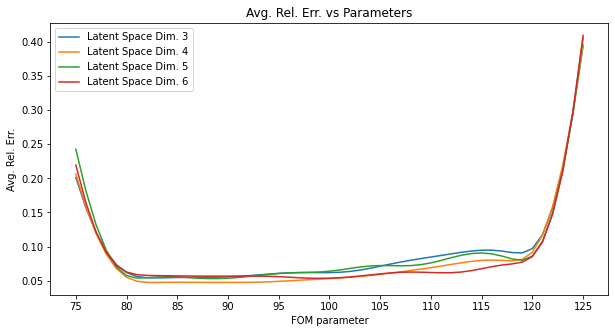

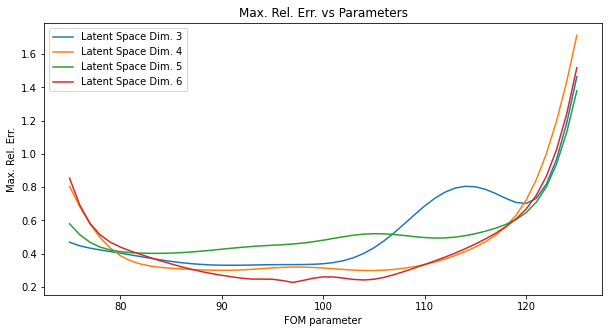

In [6]:
# with open(file=file_path_gappy_SOPT_result, mode='rb') as ff:
#     results=pickle.load(ff)    

idx=[0,1,2,3]

# figure avg.rel.err vs params
plt.figure(figsize=(10,5))
for i in idx:  
    plt.plot(FOM_parameters,results['avg_rel_err'][i])
#     plt.scatter(FOM_parameters[p_inter:-p_inter:p_inter],results['avg_rel_err'][i][p_inter:-p_inter:p_inter], color = 'blue')
plt.xlabel('FOM parameter')
plt.ylabel('Avg. Rel. Err.')
plt.legend(["Latent Space Dim. "+str(f) for f in f_list[idx]])

ax=plt.gca()
ax.xaxis.set_major_locator(IndexLocator(p_inter,0))
ax.xaxis.set_minor_locator(IndexLocator(p_inter,p_inter))
ax.tick_params(axis='x',which='minor',labelcolor='blue',labelsize=20)
plt.title('Avg. Rel. Err. vs Parameters')
# plt.savefig("./diffusion_result/ex16_AE_inner_SOPT_avg_rel_err_seed_{}.png".format(seed))

# figure rel.err vs data points
plt.figure(figsize=(10,5)) 
for i in idx:  
    plt.plot(FOM_parameters,results['rel_err'][i].max(axis=1))
#     plt.scatter(FOM_parameters[p_inter:-p_inter:p_inter],results['rel_err'][i].max(axis=1)[p_inter:-p_inter:p_inter], color = 'blue')
plt.xlabel('FOM parameter')
plt.ylabel('Max. Rel. Err.')
plt.legend(["Latent Space Dim. "+str(f) for f in f_list[idx]])
plt.title('Max. Rel. Err. vs Parameters')
# plt.savefig("./diffusion_result/ex16_AE_inner_SOPT_max_rel_err_seed_{}.png".format(seed))

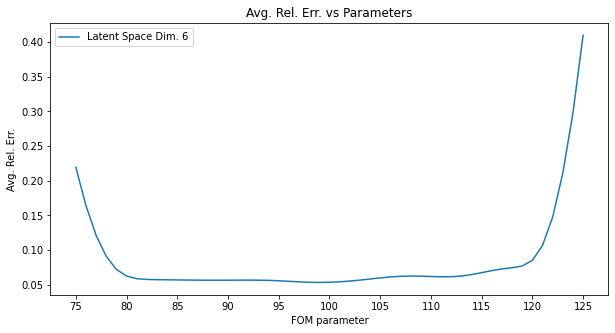

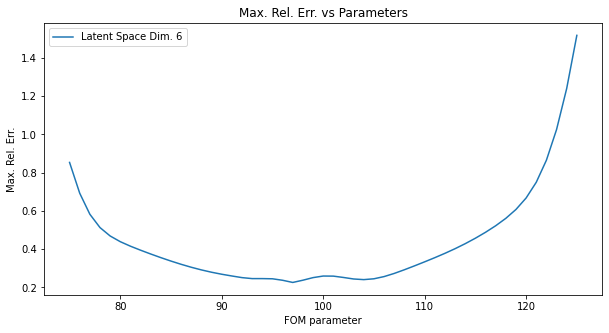

In [7]:
# with open(file=file_path_gappy_SOPT_result, mode='rb') as ff:
#     results=pickle.load(ff)    

idx = [3]

# figure avg.rel.err vs params
plt.figure(figsize=(10,5))
for i in idx:  
    plt.plot(FOM_parameters,results['avg_rel_err'][i])
#     plt.scatter(FOM_parameters[p_inter:-p_inter:p_inter],results['avg_rel_err'][i][p_inter:-p_inter:p_inter], color = 'blue')
plt.xlabel('FOM parameter')
plt.ylabel('Avg. Rel. Err.')
plt.legend(["Latent Space Dim. "+str(f) for f in f_list[idx]])

ax=plt.gca()
ax.xaxis.set_major_locator(IndexLocator(p_inter,0))
ax.xaxis.set_minor_locator(IndexLocator(p_inter,p_inter))
ax.tick_params(axis='x',which='minor',labelcolor='blue',labelsize=20)
plt.title('Avg. Rel. Err. vs Parameters')
plt.show()

# figure rel.err vs data points
plt.figure(figsize=(10,5)) 
for i in idx:  
    plt.plot(FOM_parameters,results['rel_err'][i].max(axis=1))
#     plt.scatter(FOM_parameters[p_inter:-p_inter:p_inter],results['rel_err'][i].max(axis=1)[p_inter:-p_inter:p_inter], color = 'blue')
plt.xlabel('FOM parameter')
plt.ylabel('Max. Rel. Err.')
plt.legend(["Latent Space Dim. "+str(f) for f in f_list[idx]])
plt.title('Max. Rel. Err. vs Parameters')
plt.show()

In [8]:
print(f_list)
print(FOM_parameters)

[3 4 5 6]
[ 75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125]


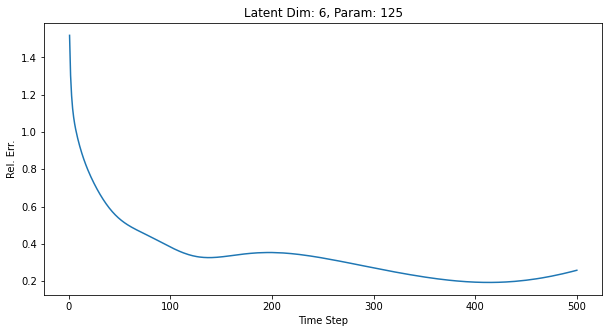

average relative error of u: 0.40987536333090857%

maximum relative error of u: 1.5187491772322075%


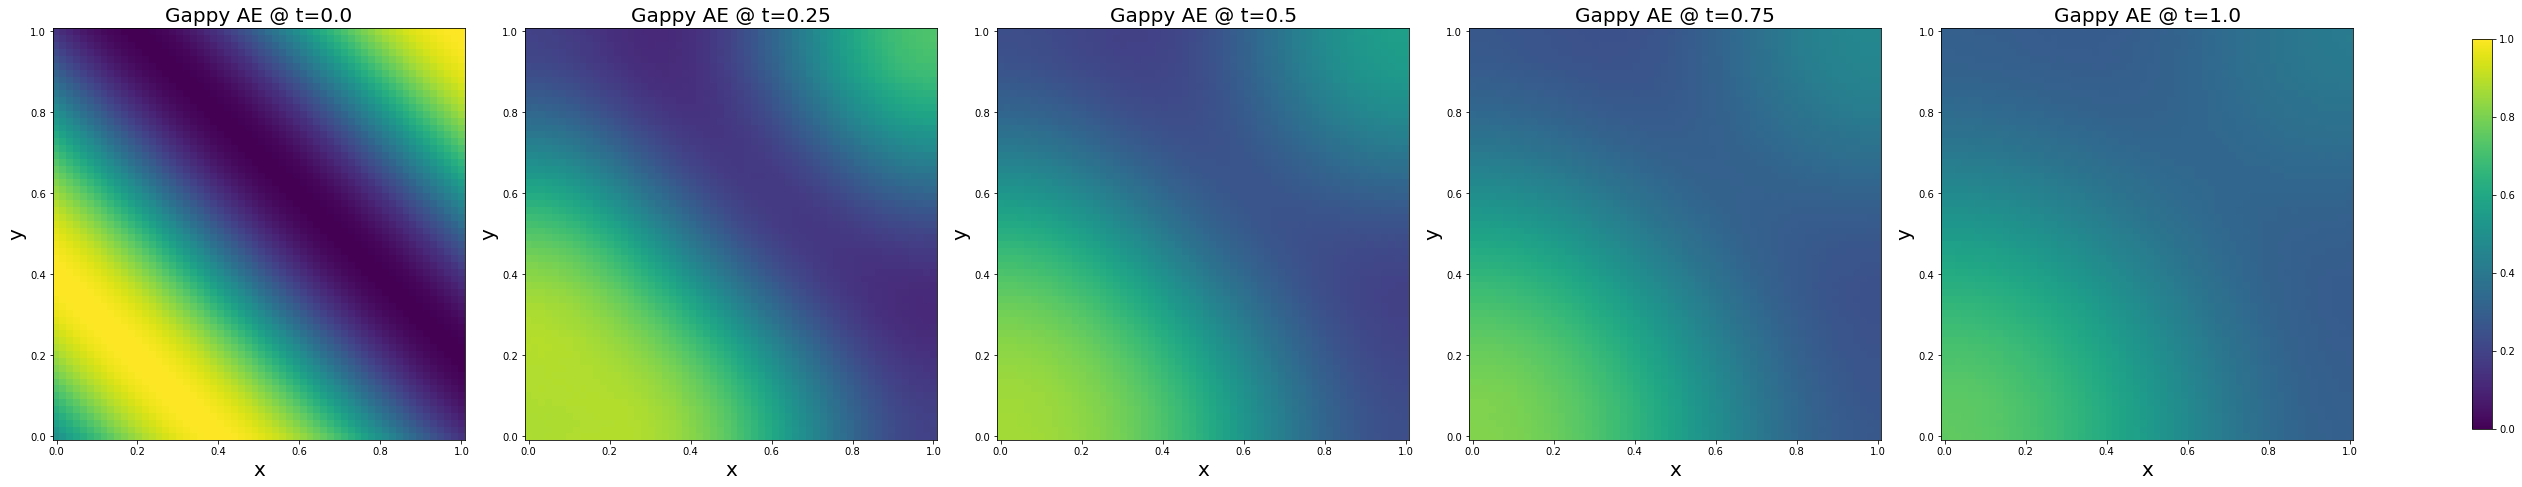

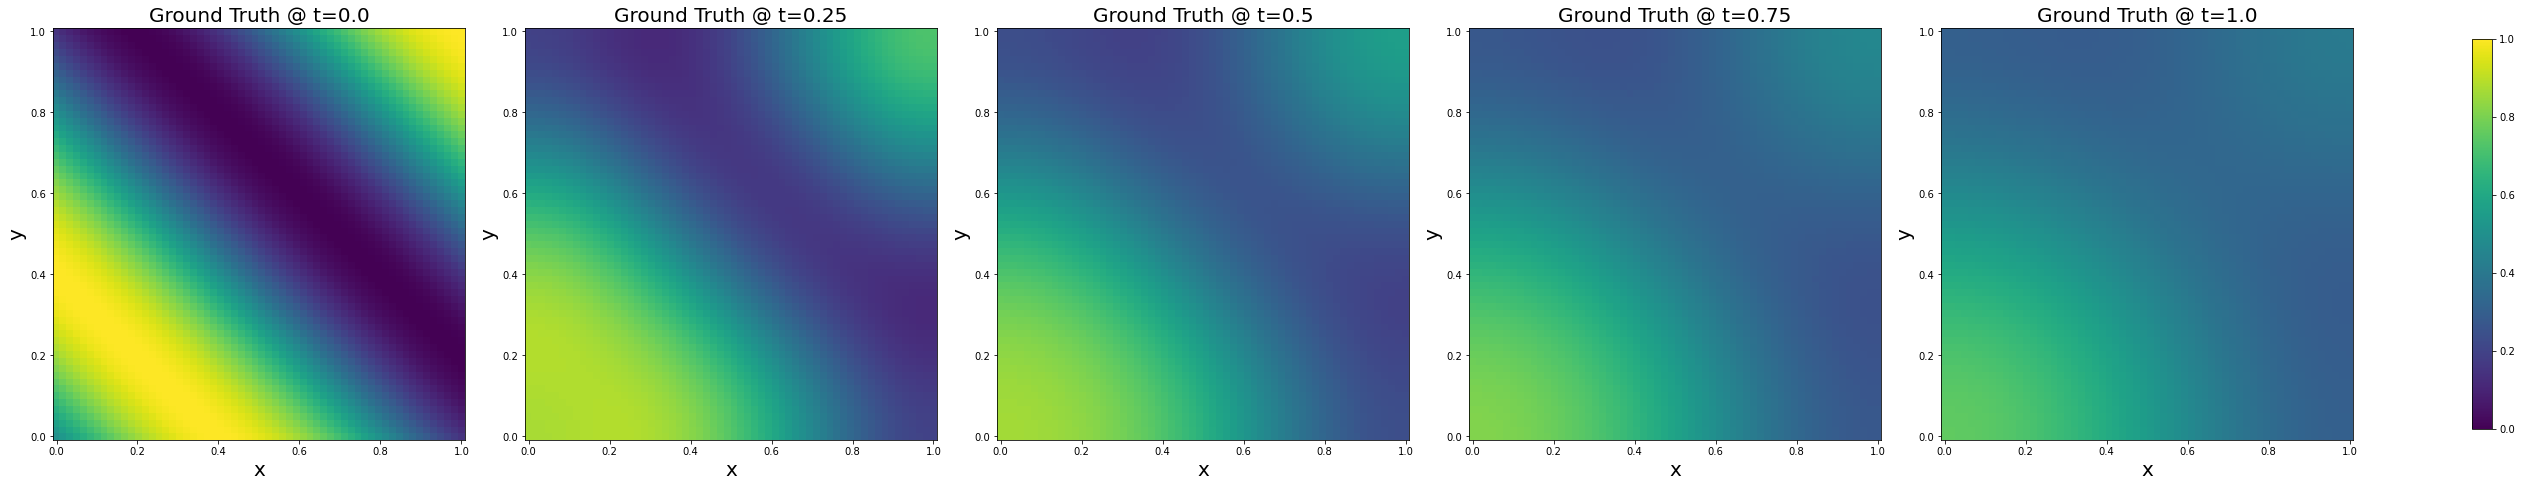

In [9]:
# figure rel.err vs at given param and POD basis
i=3; j=-1        
f=f_list[i]
param=FOM_parameters[j]

u_gappyAE=results['solution'][i,j]

ex = np.load('./diffusion_data/ex16_interp_{}.npz'.format(param), allow_pickle = True)
ex = ex.f.arr_0
u_full = ex.reshape(nt+1,-1)

plt.figure(figsize=(10,5))
plt.plot(np.arange(1,nt+1),results['rel_err'][i,j,1:].flatten())
plt.xlabel('Time Step')
plt.ylabel('Rel. Err.')
plt.title("Latent Dim: {}, Param: {}".format(f,param))
plt.show()

# error
u_rel_err_gappyAE=np.linalg.norm(u_full-u_gappyAE,ord=2,axis=1)\
                 /np.linalg.norm(u_full,ord=2,axis=1)*100
u_avg_rel_err=np.sqrt(np.sum(np.linalg.norm(u_full-u_gappyAE,ord=2,axis=1)**2))\
             /np.sqrt(np.sum(np.linalg.norm(u_full,ord=2,axis=1)**2))*100
print("average relative error of u: {}%".format(u_avg_rel_err))
print()
print("maximum relative error of u: {}%".format(np.max(u_rel_err_gappyAE)))
    
# plot original data
vmin=0; vmax=1
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(35,7),layout='constrained')
for i in range(len(axes)):
    ax=axes[i]
    pcm = ax.pcolor(x.reshape(ny,nx), y.reshape(ny,nx), u_gappyAE[int(nt/4)*i].reshape(ny,nx),vmin=vmin,vmax=vmax)
    ax.axis('square')
    ax.set_xlabel('x',fontsize=20)
    ax.set_ylabel('y',fontsize=20)
    ax.set_title('Gappy AE @ t={}'.format(int(nt/4)*i*dt),fontsize=20)

fig.colorbar(pcm, ax=axes.tolist(),shrink=0.8)
# plt.savefig("./diffusion_result/ex16_AE_{}_inner_SOPT_SOL_seed_{}.png".format(f,seed))

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(35,7),layout='constrained')
for i in range(len(axes)):
    ax=axes[i]
    pcm = ax.pcolor(x.reshape(ny,nx), y.reshape(ny,nx), u_full[int(nt/4)*i].reshape(ny,nx),vmin=vmin,vmax=vmax)
    ax.axis('square')
    ax.set_xlabel('x',fontsize=20)
    ax.set_ylabel('y',fontsize=20)
    ax.set_title('Ground Truth @ t={}'.format(int(nt/4)*i*dt),fontsize=20)

fig.colorbar(pcm, ax=axes.tolist(),shrink=0.8)
# plt.savefig("./diffusion_result/ex16_ground_truth.png")

f=6
param=125


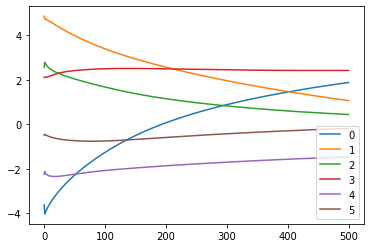

In [10]:
i=3; j=-1
f=f_list[i]; param=FOM_parameters[j]
print("f={}".format(f))
print("param={}".format(param))
plt.plot(results['reduced'][i,j][:,:f])
plt.legend(np.arange(f))
plt.show()